In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import unidecode
import time

from openpyxl import load_workbook
#import basedosdados as bd

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Queremos as seguintes colunas:

* MUNICIPIO 
* NOME_PARTIDO
* NOHOMENS 
* NOMULHERES 
* TOTAL 
* PERCENTDASVAGASDISPONIVEIS (porcentagem de candidatos que o partido ou coligação lançou em cada eleição)
* NUMERODEVAGASDISPONIVEIS

Todos os dados com as candidaturas dos anos 2016 e 2020 foram retirados daqui: https://www.tse.jus.br/hotsites/pesquisas-eleitorais/candidatos.html

# Vereadores

## 2016 (com e sem coligação)

In [2]:
path = 'consulta_cand_2016/consulta_cand_2016_BRASIL.csv'
df_2016 = pd.read_csv(path, sep=';', encoding='latin1', low_memory=False, decimal=',')

df_2016.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PR,76635,LOANDA,13,VEREADOR,160000024065,15567,EDUARDO FRANCISCO DA SILVA,EDUARDO CHAVEIRO,#NULO#,43796141900,PARANACONTABIL@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,160000001804,PMDB-PTB-PT,PMDB / PTB / PT,1,BRASILEIRA NATA,PR,-3,NOVA LONDRINA,13/10/1957,59.00,22742330663,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,217,OFFICE-BOY E CONTÍNUO,10803.91,5,SUPLENTE,N,S,1148802016,2523020166160085,2,DEFERIDO,2,DEFERIDO,SIM
1,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,CE,13897,FORTALEZA,13,VEREADOR,60000002469,40563,FRANCISCO DE ASSIS FERREIRA DO NASCIMENTO,IRMÃO FRANCISCO,#NULO#,08811300363,CONSUELODFERREIRA@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,60000000188,VOCÊ PODE ACREDITAR,REDE / PSB,1,BRASILEIRA NATA,CE,-3,QUIXADÁ,07/12/1949,67.00,3737090787,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,460018.94,4,NÃO ELEITO,N,N,532302016,2027820166060118,2,DEFERIDO,2,DEFERIDO,SIM
2,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,SP,71218,SÃO VICENTE,13,VEREADOR,250000054402,36111,ALESSANDRO ZACCHA DE ARAUJO,ALESSANDRO GIGANTE,#NULO#,16961025889,ALESSANDRO_GIGANTE@OUTLOOK.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,36,PTC,PARTIDO TRABALHISTA CRISTÃO,250000003318,PARTIDO ISOLADO,PTC,1,BRASILEIRA NATA,SP,-3,SANTOS,11/03/1971,45.00,173157390141,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),1,BRANCA,254,VIGILANTE,243964.93,4,NÃO ELEITO,N,S,2127532016,2560620166260177,2,DEFERIDO,2,DEFERIDO,SIM
3,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PB,19283,SOSSÊGO,13,VEREADOR,150000008781,20999,KATYUSKA DE SOUZA MARIA CARLOS,KAKÁ,#NULO#,08592763410,KATYUSKASOUZA@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,20,PSC,PARTIDO SOCIAL CRISTÃO,150000000680,A FORÇA DA MUDANÇA,PSDB / PTB / PSC / SD,1,BRASILEIRA NATA,PB,-3,CUBATI,09/07/1992,24.00,40468001236,4,FEMININO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,10803.91,5,SUPLENTE,N,S,533062016,2273320166150024,2,DEFERIDO,2,DEFERIDO,SIM
4,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PE,25119,PAUDALHO,13,VEREADOR,170000018018,23123,MARINALDO ANSELMO DA SILVA,TOURO DO POVO,#NULO#,59232242400,FRENTEPOPULARDOPAUDALHO@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,23,PPS,PARTIDO POPULAR SOCIALISTA,170000001139,PARA CONTINUAR AVANÇANDO,PPS / DEM / PSDC / PR,1,BRASILEIRA NATA,PE,-3,PAUDALHO,20/09/1968,48.00,59432750868,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),3,PARDA,999,OUTROS,15664.78,5,SUPLENTE,N,N,670712016,1283020166170017,2,DEFERIDO,2,DEFERIDO,SIM


In [3]:
df_2016.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

### Vagas disponíveis para vereador por município em 2016

A disposição das vagas se dá pela quantidade de habitantes do município, mas prevalece a lei orgância municipal.

Dados de vagas obtidos em: https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais

Para acessá-los basta selecionar quais os dados de interesse e fazer o download do arquivo na página tabelas detalhadas abaixo do título CANDIDATOS(AS) POR VAGA.

In [4]:
df_vagas_2016 = pd.read_csv('relacao_vaga_2016.csv', sep=';', encoding='latin1', low_memory=False, usecols=['UF', 'Município', 'Cargo', 'Quantitativo', 'Vaga'])

df_vereador_2016 = df_vagas_2016[df_vagas_2016['Cargo'] == 'Vereador']

df_vereador_2016 = df_vereador_2016.rename(columns={'Município':'NM_UE', 'Vaga': 'VAGAS'});

In [5]:
df_vereador_2016.head(10)

,UF,NM_UE,Cargo,Quantitativo,VAGAS
11136,AC,ACRELÂNDIA,Vereador,91,9
11137,AC,ASSIS BRASIL,Vereador,53,9
11138,AC,BRASILÉIA,Vereador,82,11
11139,AC,BUJARI,Vereador,85,9
11140,AC,CAPIXABA,Vereador,80,9
11141,AC,CRUZEIRO DO SUL,Vereador,178,14
11142,AC,EPITACIOLÂNDIA,Vereador,80,9
11143,AC,FEIJÓ,Vereador,92,13
11144,AC,JORDÃO,Vereador,53,9
11145,AC,MÂNCIO LIMA,Vereador,97,11


### Candidatos a vereador em 2016

Abaixo estão as coligações presentes em cada município e a quantidade de candidaturas por gênero em cada coligação, além da quantidade de candidaturas por gênero representadas por partidos isolados:

### Vereadores com coligação 

Respostas para o campo de 'DS_GENERO':

In [6]:
df_2016['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO', 'NÃO DIVULGÁVEL'], dtype=object)

Gênero Feminino

In [7]:
df_vereador_com_coligacao_genero_feminino_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'FEMININO') &
    (df_2016['TP_AGREMIACAO'] == 'COLIGAÇÃO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NM_COLIGACAO'], as_index = False)['DS_GENERO'].count()

In [8]:
df_vereador_com_coligacao_genero_feminino_2016 = df_vereador_com_coligacao_genero_feminino_2016.rename(columns={'DS_GENERO':'GENERO_FEMININO'});

In [9]:
df_vereador_com_coligacao_genero_feminino_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NM_COLIGACAO,GENERO_FEMININO
0,AC,ACRELÂNDIA,10000000128,VAMOS JUNTOS RENOVAR ACRELÂNDIA,3
1,AC,ACRELÂNDIA,10000000194,PRODUZIR PARA EMPREGAR,6
2,AC,ACRELÂNDIA,10000000229,UNIDOS POR ACRELANDIA,6
3,AC,ACRELÂNDIA,10000000290,Juntos Com Coragem e Atitude II,3
4,AC,ACRELÂNDIA,10000000291,Juntos com Coragem e Atitude I,5


Gênero Masculino

In [10]:
df_vereador_com_coligacao_genero_masculino_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'MASCULINO') &
    (df_2016['TP_AGREMIACAO'] == 'COLIGAÇÃO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NM_COLIGACAO'], as_index = False)['DS_GENERO'].count()

In [11]:
df_vereador_com_coligacao_genero_masculino_2016 = df_vereador_com_coligacao_genero_masculino_2016.rename(columns={'DS_GENERO':'GENERO_MASCULINO'});

In [12]:
df_vereador_com_coligacao_genero_masculino_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NM_COLIGACAO,GENERO_MASCULINO
0,AC,ACRELÂNDIA,10000000128,VAMOS JUNTOS RENOVAR ACRELÂNDIA,6
1,AC,ACRELÂNDIA,10000000194,PRODUZIR PARA EMPREGAR,12
2,AC,ACRELÂNDIA,10000000229,UNIDOS POR ACRELANDIA,12
3,AC,ACRELÂNDIA,10000000290,Juntos Com Coragem e Atitude II,6
4,AC,ACRELÂNDIA,10000000291,Juntos com Coragem e Atitude I,12


Genêro não divulgável

In [13]:
df_vereador_com_coligacao_nao_divulgavel_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'NÃO DIVULGÁVEL') &
    (df_2016['TP_AGREMIACAO'] == 'COLIGAÇÃO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NM_COLIGACAO'], as_index = False)['DS_GENERO'].count()

In [14]:
df_vereador_com_coligacao_nao_divulgavel_2016 = df_vereador_com_coligacao_nao_divulgavel_2016.rename(columns={'DS_GENERO':'GENERO_NAO_DIV'});

In [15]:
df_vereador_com_coligacao_nao_divulgavel_2016.head(5)

,SG_UF,NM_UE,SQ_COLIGACAO,NM_COLIGACAO,GENERO_NAO_DIV
0,CE,QUIXELÔ,60000000182,COLIGAÇÃO TODOS POR UM NOVO QUIXELÔ,1
1,MA,COELHO NETO,100000000527,AVANTE COELHO NETO,17
2,MA,MORROS,100000000266,Unidos para Mudar 1,3
3,MA,PINDARÉ-MIRIM,100000000666,PELA RECONSTRUÇÃO DO PINDARE,9
4,SP,GUAÍRA,250000003677,PSDC PMB,1


Colocando os resultados numa mesma tabela:

In [16]:
df_vereador_com_coligacao_por_genero_2016 = pd.merge(pd.merge(df_vereador_com_coligacao_genero_feminino_2016, df_vereador_com_coligacao_genero_masculino_2016[['SQ_COLIGACAO', 'GENERO_MASCULINO']], on = 'SQ_COLIGACAO', how = 'outer'),df_vereador_com_coligacao_nao_divulgavel_2016[['SQ_COLIGACAO','GENERO_NAO_DIV']], on = 'SQ_COLIGACAO', how = 'outer')

In [17]:
df_vereador_com_coligacao_por_genero_2016 = df_vereador_com_coligacao_por_genero_2016.fillna(0)

In [18]:
df_vereador_com_coligacao_por_genero_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NM_COLIGACAO,GENERO_FEMININO,GENERO_MASCULINO,GENERO_NAO_DIV
0,AC,ACRELÂNDIA,10000000128,VAMOS JUNTOS RENOVAR ACRELÂNDIA,3.00,6.00,0.00
1,AC,ACRELÂNDIA,10000000194,PRODUZIR PARA EMPREGAR,6.00,12.00,0.00
2,AC,ACRELÂNDIA,10000000229,UNIDOS POR ACRELANDIA,6.00,12.00,0.00
3,AC,ACRELÂNDIA,10000000290,Juntos Com Coragem e Atitude II,3.00,6.00,0.00
4,AC,ACRELÂNDIA,10000000291,Juntos com Coragem e Atitude I,5.00,12.00,0.00


Total de candidatos por coligação por município:

In [19]:
df_vereador_com_coligacao_por_genero_2016['TOTAL'] = df_vereador_com_coligacao_por_genero_2016['GENERO_FEMININO'] + df_vereador_com_coligacao_por_genero_2016['GENERO_MASCULINO'] + df_vereador_com_coligacao_por_genero_2016['GENERO_NAO_DIV'] 

Porcentagem de candidatos por gênero

In [20]:
df_vereador_com_coligacao_por_genero_2016['PERC_FEM'] = (df_vereador_com_coligacao_por_genero_2016['GENERO_FEMININO']/df_vereador_com_coligacao_por_genero_2016['TOTAL'])*100
df_vereador_com_coligacao_por_genero_2016['PERC_MASC'] = (df_vereador_com_coligacao_por_genero_2016['GENERO_MASCULINO']/df_vereador_com_coligacao_por_genero_2016['TOTAL'])*100
df_vereador_com_coligacao_por_genero_2016['PERC_NAO_DIV'] = (df_vereador_com_coligacao_por_genero_2016['GENERO_NAO_DIV']/df_vereador_com_coligacao_por_genero_2016['TOTAL'])*100

In [21]:
df_vereador_com_coligacao_por_genero_2016 = pd.merge(df_vereador_com_coligacao_por_genero_2016, df_vereador_2016[['NM_UE', 'VAGAS']] , on = 'NM_UE')

In [22]:
df_vereador_com_coligacao_por_genero_2016['PERCENT_OCUPADO'] = (df_vereador_com_coligacao_por_genero_2016['TOTAL']/df_vereador_com_coligacao_por_genero_2016['VAGAS'])*100

In [23]:
df_vereador_com_coligacao_por_genero_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NM_COLIGACAO,GENERO_FEMININO,GENERO_MASCULINO,GENERO_NAO_DIV,TOTAL,PERC_FEM,PERC_MASC,PERC_NAO_DIV,VAGAS,PERCENT_OCUPADO
0,AC,ACRELÂNDIA,10000000128,VAMOS JUNTOS RENOVAR ACRELÂNDIA,3.00,6.00,0.00,9.00,33.33,66.67,0.00,9,100.00
1,AC,ACRELÂNDIA,10000000194,PRODUZIR PARA EMPREGAR,6.00,12.00,0.00,18.00,33.33,66.67,0.00,9,200.00
2,AC,ACRELÂNDIA,10000000229,UNIDOS POR ACRELANDIA,6.00,12.00,0.00,18.00,33.33,66.67,0.00,9,200.00
3,AC,ACRELÂNDIA,10000000290,Juntos Com Coragem e Atitude II,3.00,6.00,0.00,9.00,33.33,66.67,0.00,9,100.00
4,AC,ACRELÂNDIA,10000000291,Juntos com Coragem e Atitude I,5.00,12.00,0.00,17.00,29.41,70.59,0.00,9,188.89


### Vereadores sem coligação

In [24]:
df_vereador_sem_coligacoes_genero_feminino_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'FEMININO') &
    (df_2016['TP_AGREMIACAO'] == 'PARTIDO ISOLADO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NR_PARTIDO', 'SG_PARTIDO'], as_index = False)['DS_GENERO'].count()
df_vereador_sem_coligacoes_genero_feminino_2016 = df_vereador_sem_coligacoes_genero_feminino_2016.rename(columns={'DS_GENERO':'GENERO_FEMININO'});

In [25]:
df_vereador_sem_coligacoes_genero_feminino_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_FEMININO
0,AC,ACRELÂNDIA,10000000237,45,PSDB,3
1,AC,ACRELÂNDIA,10000000239,13,PT,2
2,AC,ASSIS BRASIL,10000000248,65,PC do B,4
3,AC,BUJARI,10000000300,11,PP,5
4,AC,EPITACIOLÂNDIA,10000000307,77,SD,1


In [26]:
df_vereador_sem_coligacoes_genero_masculino_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'MASCULINO') &
    (df_2016['TP_AGREMIACAO'] == 'PARTIDO ISOLADO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO','NR_PARTIDO', 'SG_PARTIDO'], as_index = False)['DS_GENERO'].count()
df_vereador_sem_coligacoes_genero_masculino_2016 = df_vereador_sem_coligacoes_genero_masculino_2016.rename(columns={'DS_GENERO':'GENERO_MASCULINO'});

In [27]:
df_vereador_sem_coligacoes_genero_masculino_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_MASCULINO
0,AC,ACRELÂNDIA,10000000237,45,PSDB,7
1,AC,ACRELÂNDIA,10000000239,13,PT,4
2,AC,ASSIS BRASIL,10000000248,65,PC do B,8
3,AC,BUJARI,10000000300,11,PP,7
4,AC,MANOEL URBANO,10000000303,27,PSDC,6


In [28]:
df_vereador_sem_coligacoes_nao_divulgavel_2016 = df_2016[
    (df_2016['DS_CARGO'] == 'VEREADOR') &
    (df_2016['DS_GENERO'] == 'NÃO DIVULGÁVEL') &
    (df_2016['TP_AGREMIACAO'] == 'PARTIDO ISOLADO') &
    (df_2016['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NR_PARTIDO', 'SG_PARTIDO'], as_index = False)['DS_GENERO'].count()

df_vereador_sem_coligacoes_nao_divulgavel_2016 = df_vereador_sem_coligacoes_nao_divulgavel_2016.rename(columns={'DS_GENERO':'GENERO_NAO_DIV'});

In [29]:
df_vereador_sem_coligacoes_nao_divulgavel_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_NAO_DIV
0,MG,CONTAGEM,130000005474,31,PHS,1
1,PE,OLINDA,170000001321,33,PMN,1


In [30]:
df_vereador_sem_coligacoes_por_genero_2016 = pd.merge(pd.merge(df_vereador_sem_coligacoes_genero_feminino_2016, df_vereador_sem_coligacoes_genero_masculino_2016[['SQ_COLIGACAO', 'GENERO_MASCULINO']], on = 'SQ_COLIGACAO', how = 'outer'),df_vereador_sem_coligacoes_nao_divulgavel_2016[['SQ_COLIGACAO','GENERO_NAO_DIV']], on = 'SQ_COLIGACAO', how = 'outer')
df_vereador_sem_coligacoes_por_genero_2016 = df_vereador_sem_coligacoes_por_genero_2016.fillna(0)

In [31]:
df_vereador_sem_coligacoes_por_genero_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_FEMININO,GENERO_MASCULINO,GENERO_NAO_DIV
0,AC,ACRELÂNDIA,10000000237,45.00,PSDB,3.00,7.00,0.00
1,AC,ACRELÂNDIA,10000000239,13.00,PT,2.00,4.00,0.00
2,AC,ASSIS BRASIL,10000000248,65.00,PC do B,4.00,8.00,0.00
3,AC,BUJARI,10000000300,11.00,PP,5.00,7.00,0.00
4,AC,EPITACIOLÂNDIA,10000000307,77.00,SD,1.00,0.00,0.00


In [32]:
df_vereador_sem_coligacoes_por_genero_2016['TOTAL'] = df_vereador_sem_coligacoes_por_genero_2016['GENERO_FEMININO'] + df_vereador_sem_coligacoes_por_genero_2016['GENERO_MASCULINO'] + df_vereador_sem_coligacoes_por_genero_2016['GENERO_NAO_DIV']
df_vereador_sem_coligacoes_por_genero_2016['PERC_FEM'] = (df_vereador_sem_coligacoes_por_genero_2016['GENERO_FEMININO']/df_vereador_sem_coligacoes_por_genero_2016['TOTAL'])*100
df_vereador_sem_coligacoes_por_genero_2016['PERC_MASC'] = (df_vereador_sem_coligacoes_por_genero_2016['GENERO_MASCULINO']/df_vereador_sem_coligacoes_por_genero_2016['TOTAL'])*100
df_vereador_sem_coligacoes_por_genero_2016['PERC_NAO_DIV'] = (df_vereador_sem_coligacoes_por_genero_2016['GENERO_NAO_DIV']/df_vereador_sem_coligacoes_por_genero_2016['TOTAL'])*100

In [33]:
df_vereador_sem_coligacoes_por_genero_2016 = pd.merge(df_vereador_sem_coligacoes_por_genero_2016, df_vereador_2016[['NM_UE', 'VAGAS']] , on = 'NM_UE')

In [34]:
df_vereador_sem_coligacoes_por_genero_2016['PERCENT_OCUPADO'] = (df_vereador_sem_coligacoes_por_genero_2016['TOTAL']/df_vereador_sem_coligacoes_por_genero_2016['VAGAS'])*100

In [35]:
df_vereador_sem_coligacoes_por_genero_2016.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_FEMININO,GENERO_MASCULINO,GENERO_NAO_DIV,TOTAL,PERC_FEM,PERC_MASC,PERC_NAO_DIV,VAGAS,PERCENT_OCUPADO
0,AC,ACRELÂNDIA,10000000237,45.00,PSDB,3.00,7.00,0.00,10.00,30.00,70.00,0.00,9,111.11
1,AC,ACRELÂNDIA,10000000239,13.00,PT,2.00,4.00,0.00,6.00,33.33,66.67,0.00,9,66.67
2,AC,ASSIS BRASIL,10000000248,65.00,PC do B,4.00,8.00,0.00,12.00,33.33,66.67,0.00,9,133.33
3,AC,BUJARI,10000000300,11.00,PP,5.00,7.00,0.00,12.00,41.67,58.33,0.00,9,133.33
4,AC,EPITACIOLÂNDIA,10000000307,77.00,SD,1.00,0.00,0.00,1.00,100.00,0.00,0.00,9,11.11


## 2020 (sem coligação)

"Pela primeira vez, partidos políticos não poderão se coligar para concorrerem ao cargo de vereador, podendo apresentar pedidos somente de forma isolada".  A nova regra foi fixada pela Emenda Constitucional nº 97/2017.

https://www.tse.jus.br/imprensa/noticias-tse/2020/Novembro/eleicoes-2020-58-208-vagas-de-vereadores-estarao-em-disputa-neste-domingo-15

A disposição das vagas se dá pela quantidade de habitantes do município, mas prevalece a lei orgância municipal.

Dados de vagas obtidos em: https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais

Para acessá-los basta selecionar quais os dados de interesse e fazer o download do arquivo na página tabelas detalhadas abaixo do título CANDIDATOS(AS) POR VAGA.

### Vagas disponíveis para vereador por município

In [36]:
df_vagas_2020 = pd.read_csv('relacao_vaga_2020.csv', sep=';', encoding='latin1', low_memory=False, usecols=['UF', 'Município', 'Cargo', 'Quantitativo', 'Vaga'])

df_vereador_2020 = df_vagas_2020[df_vagas_2020['Cargo'] == 'Vereador']

df_vereador_2020 = df_vereador_2020.rename(columns={'Município':'NM_UE', 'Vaga':'VAGAS'});

In [37]:
df_vereador_2020.head(10)

,UF,NM_UE,Cargo,Quantitativo,VAGAS
11136,AC,ACRELÂNDIA,Vereador,79,9
11137,AC,ASSIS BRASIL,Vereador,85,9
11138,AC,BRASILÉIA,Vereador,136,11
11139,AC,BUJARI,Vereador,130,9
11140,AC,CAPIXABA,Vereador,104,9
11141,AC,CRUZEIRO DO SUL,Vereador,209,14
11142,AC,EPITACIOLÂNDIA,Vereador,127,9
11143,AC,FEIJÓ,Vereador,141,13
11144,AC,JORDÃO,Vereador,74,9
11145,AC,MÂNCIO LIMA,Vereador,125,11


In [38]:
path = 'consulta_cand_2020/consulta_cand_2020_BRASIL.csv'
df_2020 = pd.read_csv(path, sep=';', encoding='latin1', low_memory=False, decimal=',')

df_2020.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,29/05/2021,12:19:11,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,65099,ILHABELA,13,VEREADOR,250001078745,70565,JOSE PEREIRA BRANDÃO,ZÉ BRANDÃO,#NULO#,5400594808,ILHAVIVA2020@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,70,AVANTE,AVANTE,250000130531,PARTIDO ISOLADO,AVANTE,1,BRASILEIRA NATA,MG,-3,GRÃO MOGOL,08/03/1958,62,47636980108,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,9,DIVORCIADO(A),3,PARDA,709,TRABALHADOR DE CONSTRUÇÃO CIVIL,12307.75,5,SUPLENTE,N,S,-1,6005873520206260132,2,DEFERIDO,2,DEFERIDO,SIM
1,29/05/2021,12:19:11,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,BA,37567,NOVA FÁTIMA,13,VEREADOR,50000941067,11135,ERIVANIA ARAUJO DA SILVA,KAL ARAUJO,#NULO#,3279617596,UNIDOSPORNOVAFATIMA@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,11,PP,PROGRESSISTAS,50000108688,PARTIDO ISOLADO,PP,1,BRASILEIRA NATA,BA,-3,RIACHÃO DO JACUÍPE,01/04/1986,34,116352710507,4,FEMININO,7,SUPERIOR INCOMPLETO,9,DIVORCIADO(A),3,PARDA,254,VIGILANTE,12307.75,5,SUPLENTE,N,S,-1,6001862320206050196,2,DEFERIDO,2,DEFERIDO,SIM
2,29/05/2021,12:19:11,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,19763,ALCANTIL,13,VEREADOR,150000859227,12112,ARLETE BARBOSA COSTA,ARLETE,#NULO#,26253330497,JOAO.RODRIGUES.SEGUNDO@OUTLOOK.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,150000093695,PARTIDO ISOLADO,PDT,1,BRASILEIRA NATA,PB,-3,BOQUEIRÃO,12/02/1959,61,11174261295,4,FEMININO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,12307.75,5,SUPLENTE,N,S,-1,6001080220206150018,2,DEFERIDO,2,DEFERIDO,SIM
3,29/05/2021,12:19:11,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,70971,SÃO JOSÉ DO RIO PRETO,13,VEREADOR,250001178195,11123,DAVID MARCELINO CARDOZO,DAVID CARDOZO,#NULO#,6451512893,DAVI.CARDOZO@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,11,PP,PROGRESSISTAS,250000145024,PARTIDO ISOLADO,PP,1,BRASILEIRA NATA,SP,-3,SÃO JOSÉ DO RIO PRETO,07/05/1965,55,58495610141,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,133,SOCIÓLOGO,113318.61,5,SUPLENTE,N,S,-1,6004308320206260125,2,DEFERIDO,2,DEFERIDO,SIM
4,29/05/2021,12:19:11,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,71072,SÃO PAULO,13,VEREADOR,250001159238,90333,MANOEL MILANEZ DA SILVA FILHO,MILANEZ,#NULO#,84883987434,MILANEZEFMANO@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,90,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,250000140997,PARTIDO ISOLADO,PROS,1,BRASILEIRA NATA,SP,-3,SÃO PAULO,04/11/1973,47,40986080809,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,257,EMPRESÁRIO,3675197.12,4,NÃO ELEITO,N,N,-1,6019843720206260001,2,DEFERIDO,2,DEFERIDO,SIM


In [39]:
df_2020.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [40]:
df_2020['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [41]:
df_vereador_sem_coligacoes_genero_feminino_2020 = df_2020[
    (df_2020['DS_CARGO'] == 'VEREADOR') &
    (df_2020['DS_GENERO'] == 'FEMININO') &
    (df_2020['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NR_PARTIDO', 'SG_PARTIDO'], as_index = False)['DS_GENERO'].count()
df_vereador_sem_coligacoes_genero_feminino_2020 = df_vereador_sem_coligacoes_genero_feminino_2020.rename(columns={'DS_GENERO':'GENERO_FEMININO'});

In [42]:
df_vereador_sem_coligacoes_genero_feminino_2020.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_FEMININO
0,AC,ACRELÂNDIA,10000065140,55,PSD,3
1,AC,ACRELÂNDIA,10000065149,90,PROS,3
2,AC,ACRELÂNDIA,10000092525,45,PSDB,3
3,AC,ACRELÂNDIA,10000092585,11,PP,5
4,AC,ACRELÂNDIA,10000113916,77,SOLIDARIEDADE,4


In [43]:
df_vereador_sem_coligacoes_genero_masculino_2020 = df_2020[
    (df_2020['DS_CARGO'] == 'VEREADOR') &
    (df_2020['DS_GENERO'] == 'MASCULINO') &
    (df_2020['DS_SITUACAO_CANDIDATURA'] == 'APTO')
].groupby(['SG_UF','NM_UE', 'SQ_COLIGACAO', 'NR_PARTIDO', 'SG_PARTIDO'], as_index = False)['DS_GENERO'].count()
df_vereador_sem_coligacoes_genero_masculino_2020 = df_vereador_sem_coligacoes_genero_masculino_2020.rename(columns={'DS_GENERO':'GENERO_MASCULINO'});

In [44]:
df_vereador_sem_coligacoes_genero_masculino_2020.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_MASCULINO
0,AC,ACRELÂNDIA,10000065140,55,PSD,6
1,AC,ACRELÂNDIA,10000065149,90,PROS,5
2,AC,ACRELÂNDIA,10000092525,45,PSDB,7
3,AC,ACRELÂNDIA,10000092585,11,PP,9
4,AC,ACRELÂNDIA,10000113916,77,SOLIDARIEDADE,8


In [45]:
df_vereador_sem_coligacoes_por_genero_2020 = pd.merge(df_vereador_sem_coligacoes_genero_feminino_2020, df_vereador_sem_coligacoes_genero_masculino_2020[['SQ_COLIGACAO', 'GENERO_MASCULINO']], on = 'SQ_COLIGACAO', how = 'outer')
df_vereador_sem_coligacoes_por_genero_2016 = df_vereador_sem_coligacoes_por_genero_2016.fillna(0)

In [46]:
df_vereador_sem_coligacoes_por_genero_2020['TOTAL'] = df_vereador_sem_coligacoes_por_genero_2020['GENERO_FEMININO'] + df_vereador_sem_coligacoes_por_genero_2020['GENERO_MASCULINO']
df_vereador_sem_coligacoes_por_genero_2020['PERC_FEM'] = (df_vereador_sem_coligacoes_por_genero_2020['GENERO_FEMININO']/df_vereador_sem_coligacoes_por_genero_2020['TOTAL'])*100
df_vereador_sem_coligacoes_por_genero_2020['PERC_MASC'] = (df_vereador_sem_coligacoes_por_genero_2020['GENERO_MASCULINO']/df_vereador_sem_coligacoes_por_genero_2020['TOTAL'])*100

In [47]:
df_vereador_sem_coligacoes_por_genero_2020 = pd.merge(df_vereador_sem_coligacoes_por_genero_2020, df_vereador_2020[['NM_UE', 'VAGAS']] , on = 'NM_UE')
df_vereador_sem_coligacoes_por_genero_2020['PERCENT_OCUPADO'] = (df_vereador_sem_coligacoes_por_genero_2020['TOTAL']/df_vereador_sem_coligacoes_por_genero_2020['VAGAS'])*100

In [48]:
df_vereador_sem_coligacoes_por_genero_2020.head()

,SG_UF,NM_UE,SQ_COLIGACAO,NR_PARTIDO,SG_PARTIDO,GENERO_FEMININO,GENERO_MASCULINO,TOTAL,PERC_FEM,PERC_MASC,VAGAS,PERCENT_OCUPADO
0,AC,ACRELÂNDIA,10000065140,55.00,PSD,3.00,6.00,9.00,33.33,66.67,9,100.00
1,AC,ACRELÂNDIA,10000065149,90.00,PROS,3.00,5.00,8.00,37.50,62.50,9,88.89
2,AC,ACRELÂNDIA,10000092525,45.00,PSDB,3.00,7.00,10.00,30.00,70.00,9,111.11
3,AC,ACRELÂNDIA,10000092585,11.00,PP,5.00,9.00,14.00,35.71,64.29,9,155.56
4,AC,ACRELÂNDIA,10000113916,77.00,SOLIDARIEDADE,4.00,8.00,12.00,33.33,66.67,9,133.33


Top 10 partidos com a quantidade de cidades onde o número de vagas disponíveis para candidaturas não foi totalmente preenchida:

In [73]:
df_vereador_partidos_que_nao_preencheram_vagas_disponiveis_2020 = df_vereador_sem_coligacoes_por_genero_2020[df_vereador_sem_coligacoes_por_genero_2020['PERCENT_OCUPADO'] < 150].groupby('SG_PARTIDO', as_index = False)['NM_UE'].count().sort_values(by = ['NM_UE'], ascending = False)
df_vereador_partidos_que_nao_preencheram_vagas_disponiveis_2020.head(10)

,SG_PARTIDO,NM_UE
4,MDB,3116
25,PT,2920
15,PP,2711
20,PSD,2651
21,PSDB,2289
3,DEM,2203
10,PDT,1970
11,PL,1961
18,PSB,1900
30,REPUBLICANOS,1809


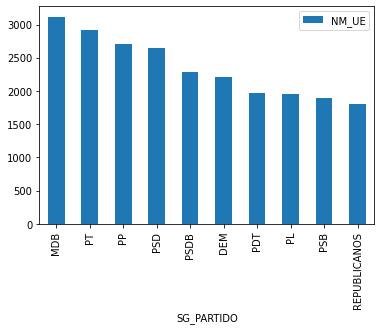

In [72]:
 df_vereador_partidos_que_nao_preencheram_vagas_disponiveis_2020.head(10).plot(x = 'SG_PARTIDO', kind='bar');